# **ZOO SORTER**

# **Installing Python Libraries**


# Importing the required libraries


**NumPy library** is essential for numerical operations

**Seaborn library** is a data visualization library based on Matplotlib.

**TensorFlow library** is an open-source machine learning framework used for building and training neural networks.

**Pyplot module** is used for creating static, interactive, and animated visualizations in Python.

**Tensorflow.keras.preprocessing import image** imports the image module from
TensorFlow's Keras preprocessing utilities.

**Tensorflow.keras.preprocessing.image import ImageDataGenerator** imports the ImageDataGenerator class from the same module.

**Sklearn.metrics** imports specific functions from the used for evaluating the performance of classification models.

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Defining the batch size and dimensions of the dataset

In [ ]:
batch_size =32
img_size = (224,224)

# Setting the preprocessing parameters of the dataset

In [ ]:
traindatagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, horizontal_flip=True, zoom_range=0.2)

# Displaying the dictionary of preprocessing features

In [ ]:
display(traindatagen.__dict__)

{'featurewise_center': False,
 'samplewise_center': False,
 'featurewise_std_normalization': False,
 'samplewise_std_normalization': False,
 'zca_whitening': False,
 'zca_epsilon': 1e-06,
 'rotation_range': 0,
 'width_shift_range': 0.0,
 'height_shift_range': 0.0,
 'shear_range': 0.0,
 'zoom_range': [0.8, 1.2],
 'channel_shift_range': 0.0,
 'fill_mode': 'nearest',
 'cval': 0.0,
 'horizontal_flip': True,
 'vertical_flip': False,
 'rescale': 0.00392156862745098,
 'preprocessing_function': None,
 'dtype': 'float32',
 'interpolation_order': 1,
 'data_format': 'channels_last',
 'channel_axis': 3,
 'row_axis': 1,
 'col_axis': 2,
 '_validation_split': 0.2,
 'mean': None,
 'std': None,
 'zca_whitening_matrix': None,
 'brightness_range': None}

# Uploading Training Data from Directory

In [ ]:
traingenerator = traindatagen.flow_from_directory("/content/drive/MyDrive/ML Datasets/Animal Classification dataset/", target_size=img_size, class_mode='categorical', subset='training')

Found 1560 images belonging to 15 classes.


# Uploading Validating Data from Directory

In [ ]:
valgenerator = traindatagen.flow_from_directory("/content/drive/MyDrive/ML Datasets/Animal Classification dataset/", target_size=img_size, class_mode='categorical', subset='validation')

Found 383 images belonging to 15 classes.


# Importing the Model and Its requisites

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Defining the Base Model

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
# Here we freeze the base model.

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Defining the layered structure of the Base Model

In [ ]:
ZSModel = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(15, activation='softmax')])

# Compiling the Base Model

In [ ]:
ZSModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Base Model

In [ ]:
history = ZSModel.fit(traingenerator, validation_data=valgenerator, epochs=10)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 1202s 24s/step - accuracy: 0.3833 - loss: 2.1300 - val_accuracy: 0.8068 - val_loss: 0.6477
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step - accuracy: 0.8056 - loss: 0.6627 - val_accuracy: 0.8642 - val_loss: 0.5061
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 138s 3s/step - accuracy: 0.8635 - loss: 0.4549 - val_accuracy: 0.8538 - val_loss: 0.5160
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.8800 - loss: 0.3578 - val_accuracy: 0.8721 - val_loss: 0.4221
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 130s 3s/step - accuracy: 0.8928 - loss: 0.3300 - val_accuracy: 0.8616 - val_loss: 0.4440
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.9069 - loss: 0.2959 - val_accuracy: 0.8564 - val_loss: 0.4603
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 137s 3s/step - accuracy: 0.9045 - loss: 0.2612 - val_accuracy: 0.8590 - val_loss: 0.4422
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.9318 - loss: 0.2182 - val_accuracy: 0.8512 -

# Visualizing the accuracy of the Trained Base Model

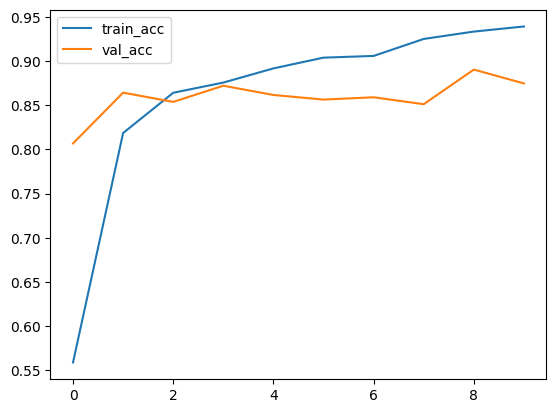

In [ ]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Compiling the Fine Tuning Model

In [ ]:
base_model.trainable = True
# Here we unfreeze the base model.

ZSModel.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# Training the Fine Tuning Model

In [ ]:
finetune_history = ZSModel.fit(traingenerator, validation_data=valgenerator, epochs=5)

Epoch 1/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 445s 8s/step - accuracy: 0.8067 - loss: 0.7353 - val_accuracy: 0.8773 - val_loss: 0.3763
Epoch 2/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 403s 8s/step - accuracy: 0.8623 - loss: 0.4284 - val_accuracy: 0.8773 - val_loss: 0.4100
Epoch 3/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 418s 9s/step - accuracy: 0.8933 - loss: 0.3185 - val_accuracy: 0.8799 - val_loss: 0.4057
Epoch 4/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.9045 - loss: 0.2843 - val_accuracy: 0.8930 - val_loss: 0.3459
Epoch 5/5
49/49 ━━━━━━━━━━━━━━━━━━━━ 388s 8s/step - accuracy: 0.9344 - loss: 0.2204 - val_accuracy: 0.9086 - val_loss: 0.2940


# Visualizing the accuracy of the Trained Fine Tuning Model

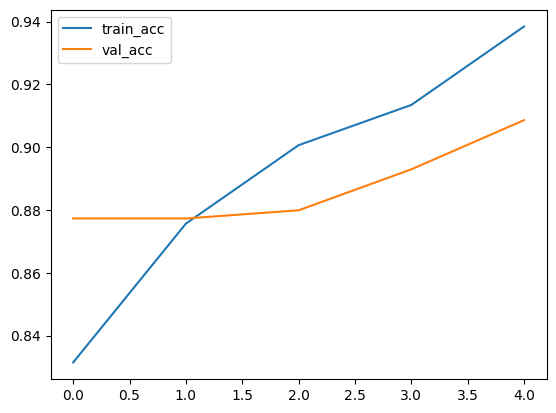

In [ ]:
plt.plot(finetune_history.history['accuracy'], label='train_acc')
plt.plot(finetune_history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Generating the Classification Report

In [ ]:
# Evaluate the model on the validation data
loss, accuracy = ZSModel.evaluate(valgenerator)

print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Generate classification report
# Get predictions for the validation set
Ypred = ZSModel.predict(valgenerator)
ypred = np.argmax(Ypred, axis=1)

print("\nClassification Report: \n", classification_report(valgenerator.classes, ypred, target_names=list(valgenerator.class_indices.keys())))

12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8937 - loss: 0.3433
Validation Loss: 0.3324
Validation Accuracy: 0.9060
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step

Classification Report: 
               precision    recall  f1-score   support

        Bear       0.04      0.04      0.04        25
        Bird       0.03      0.04      0.04        27
         Cat       0.07      0.08      0.08        24
         Cow       0.05      0.04      0.04        26
        Deer       0.04      0.04      0.04        25
         Dog       0.12      0.12      0.12        24
     Dolphin       0.11      0.12      0.11        25
    Elephant       0.05      0.04      0.04        26
     Giraffe       0.04      0.04      0.04        25
       Horse       0.04      0.04      0.04        26
    Kangaroo       0.08      0.08      0.08        25
        Lion       0.04      0.04      0.04        26
       Panda       0.14      0.15      0.15        27
       Tiger       0.05      0.04      0.05        25

# Generating the Confusion Matrix

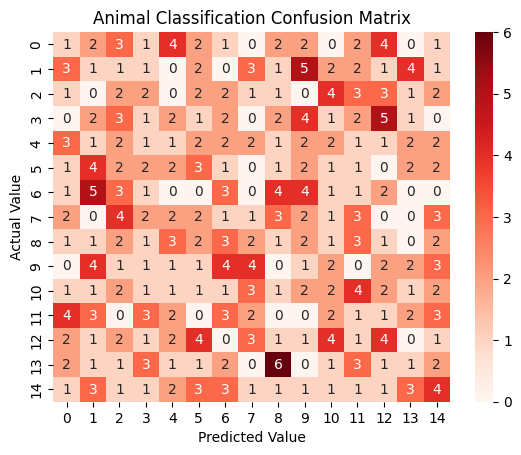

In [ ]:
# Calculate the confusion matrix using the true labels and predicted labels
matrix = confusion_matrix(valgenerator.classes, ypred)

sns.heatmap(matrix, annot=True, fmt='d', cmap='Reds')
# Here fmt = 'd' helps to convert the output data to integers.

plt.title("Animal Classification Confusion Matrix")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

# **Predict on New Image**

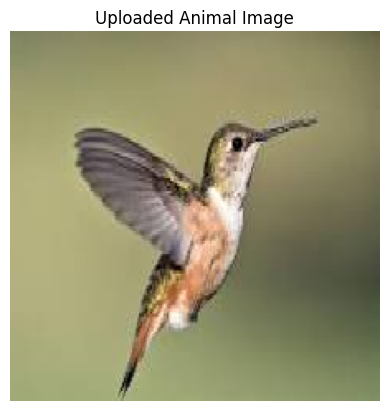

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Predicted Animal:  Bird


In [ ]:
image_path = '/content/drive/MyDrive/ML Datasets/Test Images/test bird.jpg'
# Here we set the path of the image to be uploaded.

img = image.load_img(image_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) / 255.0
# Here we resize the uploaded image.

plt.imshow(img)
# Here we show the uploaded image.

plt.axis('off')
plt.title("Uploaded Animal Image")
plt.show()
prediction = ZSModel.predict(img_array)
# Here we predict the animal shown in the image.

predictedclass = list(traingenerator.class_indices.keys())[np.argmax(prediction)]
print("Predicted Animal: ", predictedclass)